### Custom GPT implementation

In [1]:
%cd ../..
import torch
from inpainting.models import GPT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 102874


Device set to cuda


In [2]:
mnist = MNIST(frac=0.05, clusters=35, unimask=False, shape=4)
weights = 1/mnist.distribution

In [3]:
model = GPT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens * 4,  # Hidden size
    num_layers = 4,                 # Number of Transformer layers
    num_heads = 4,                  # Numbertargets of attention heads
    max_len = (28//mnist.shape)**2, # Maximum sequence length
	ce_weights=weights,
	patches=mnist.itop(torch.arange(mnist.clusters)),
)

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib64/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [4]:
Trainer(model, mnist).train(epochs=50, batch_size=100, lr=2e-4, warmup_steps=0)

running on device cuda
Epoch: 0.00	RMSE: 86.94	Loss: 5.13e+03	Learning Rate: 1.99e-04
Epoch: 0.00	RMSE: 63.91	Loss: 3.07e+03	Learning Rate: 1.97e-04
Epoch: 0.00	RMSE: 58.37	Loss: 2.61e+03	Learning Rate: 1.96e-04
Epoch: 1.00	RMSE: 51.72	Loss: 1.91e+03	Learning Rate: 1.95e-04
Epoch: 1.00	RMSE: 49.22	Loss: 1.61e+03	Learning Rate: 1.93e-04
Epoch: 1.00	RMSE: 47.48	Loss: 1.39e+03	Learning Rate: 1.92e-04
Epoch: 2.00	RMSE: 46.85	Loss: 1.26e+03	Learning Rate: 1.91e-04
Epoch: 2.00	RMSE: 46.41	Loss: 1.28e+03	Learning Rate: 1.89e-04
Epoch: 2.00	RMSE: 42.89	Loss: 1.11e+03	Learning Rate: 1.88e-04
Epoch: 3.00	RMSE: 43.04	Loss: 1.09e+03	Learning Rate: 1.87e-04
Epoch: 3.00	RMSE: 41.29	Loss: 9.81e+02	Learning Rate: 1.85e-04
Epoch: 3.00	RMSE: 42.40	Loss: 9.94e+02	Learning Rate: 1.84e-04
Epoch: 4.00	RMSE: 40.76	Loss: 9.12e+02	Learning Rate: 1.83e-04
Epoch: 4.00	RMSE: 40.46	Loss: 8.98e+02	Learning Rate: 1.81e-04
Epoch: 4.00	RMSE: 39.37	Loss: 8.44e+02	Learning Rate: 1.80e-04
Epoch: 5.00	RMSE: 41.57	Loss: 9.

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7a8sbh1r'


Epoch: 36.00	RMSE: 29.76	Loss: 6.06e+02	Learning Rate: 5.33e-05
Epoch: 36.00	RMSE: 27.84	Loss: 5.52e+02	Learning Rate: 5.20e-05
Epoch: 37.00	RMSE: 28.76	Loss: 5.74e+02	Learning Rate: 5.07e-05
Epoch: 37.00	RMSE: 32.34	Loss: 6.95e+02	Learning Rate: 4.93e-05
Epoch: 37.00	RMSE: 28.96	Loss: 6.06e+02	Learning Rate: 4.80e-05
Epoch: 38.00	RMSE: 29.61	Loss: 6.18e+02	Learning Rate: 4.67e-05
Epoch: 38.00	RMSE: 29.78	Loss: 6.50e+02	Learning Rate: 4.53e-05
Epoch: 38.00	RMSE: 30.12	Loss: 6.27e+02	Learning Rate: 4.40e-05
Epoch: 39.00	RMSE: 29.81	Loss: 6.08e+02	Learning Rate: 4.27e-05
Epoch: 39.00	RMSE: 29.12	Loss: 5.75e+02	Learning Rate: 4.13e-05
Epoch: 39.00	RMSE: 28.91	Loss: 5.87e+02	Learning Rate: 4.00e-05
Epoch: 40.00	RMSE: 27.72	Loss: 5.37e+02	Learning Rate: 3.87e-05
Epoch: 40.00	RMSE: 27.48	Loss: 5.68e+02	Learning Rate: 3.73e-05
Epoch: 40.00	RMSE: 32.01	Loss: 6.65e+02	Learning Rate: 3.60e-05
Epoch: 41.00	RMSE: 30.74	Loss: 6.55e+02	Learning Rate: 3.47e-05
Epoch: 41.00	RMSE: 28.28	Loss: 5.85e+02	

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n8bfoe18'


Epoch: 42.00	RMSE: 30.96	Loss: 6.03e+02	Learning Rate: 2.80e-05
Epoch: 43.00	RMSE: 30.15	Loss: 6.50e+02	Learning Rate: 2.67e-05
Epoch: 43.00	RMSE: 29.07	Loss: 5.75e+02	Learning Rate: 2.53e-05
Epoch: 43.00	RMSE: 27.55	Loss: 5.66e+02	Learning Rate: 2.40e-05
Epoch: 44.00	RMSE: 29.69	Loss: 6.13e+02	Learning Rate: 2.27e-05
Epoch: 44.00	RMSE: 32.74	Loss: 6.85e+02	Learning Rate: 2.13e-05
Epoch: 44.00	RMSE: 29.31	Loss: 5.89e+02	Learning Rate: 2.00e-05
Epoch: 45.00	RMSE: 29.79	Loss: 6.11e+02	Learning Rate: 1.87e-05
Epoch: 45.00	RMSE: 29.14	Loss: 5.86e+02	Learning Rate: 1.73e-05
Epoch: 45.00	RMSE: 28.54	Loss: 5.81e+02	Learning Rate: 1.60e-05
Epoch: 46.00	RMSE: 29.25	Loss: 6.16e+02	Learning Rate: 1.47e-05
Epoch: 46.00	RMSE: 30.93	Loss: 6.32e+02	Learning Rate: 1.33e-05
Epoch: 46.00	RMSE: 26.98	Loss: 5.34e+02	Learning Rate: 1.20e-05
Epoch: 47.00	RMSE: 30.27	Loss: 6.42e+02	Learning Rate: 1.07e-05
Epoch: 47.00	RMSE: 27.70	Loss: 5.64e+02	Learning Rate: 9.33e-06
Epoch: 47.00	RMSE: 29.71	Loss: 6.07e+02	

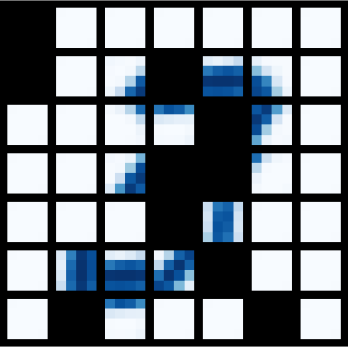

In [10]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

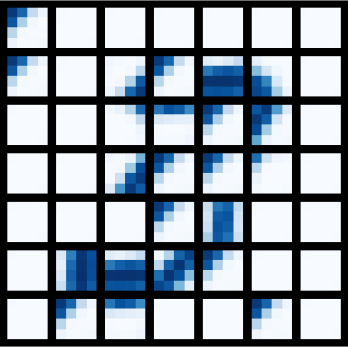

In [11]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)